# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Soldevilla, Thoreenz\
_Student No._: 2021-04225\
_Section_: THU-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 12/12/23, 3:09 AM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Thoreenz Soldevilla

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **98**/100

Score breakdown:
* Problem 1 - 98/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

We first import the necessary libraries for our problem. We also need to import $\tt numba$ since it enables us to accelerate the runtime for each cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
import numba
from numba import jit

Here, we define the ising model by choosing the size of a square matrix to be $N=20$. From here, we create a matrix $\tt random0$ that contains a random number from 0 to 1 for each entry.

In [2]:
N = 20
random_0 = np.random.random((N,N))

array([[4.69287363e-01, 5.17677096e-01, 4.18578724e-01, 3.43075822e-01,
        3.25860856e-01, 9.09280077e-01, 6.52956812e-01, 8.07816617e-01,
        7.91101030e-01, 1.24426293e-01, 6.57324779e-01, 7.12374593e-01,
        9.06212775e-01, 4.14993891e-01, 7.29564258e-01, 9.63412615e-01,
        4.79537302e-01, 1.16347350e-01, 6.09549205e-01, 5.74057674e-01],
       [4.72952667e-02, 1.42370260e-01, 2.59445812e-01, 5.24182259e-01,
        7.69724891e-01, 4.99595149e-01, 4.97111404e-01, 7.18736714e-01,
        5.65464196e-01, 9.18701774e-01, 9.36321587e-01, 9.67610370e-01,
        2.08922551e-02, 8.13923741e-01, 2.62765397e-01, 7.58131436e-01,
        8.99156592e-01, 5.12132889e-01, 2.02785295e-01, 7.55794586e-01],
       [1.59903668e-03, 4.99784455e-01, 1.19008466e-01, 6.17100604e-01,
        2.01843070e-01, 2.36822833e-01, 5.04968477e-01, 9.51840726e-01,
        5.96510768e-01, 7.26759356e-01, 2.51479570e-01, 4.90106916e-02,
        6.73362106e-01, 2.44397034e-01, 4.66674609e-01, 4.5227

We then visualize the lattice. We make a new matrix $\tt lattice0$ and assign the entries of $\tt random0$ as the spin values -1 (down) and 1 (up). The entry is 1 when it is above 0.5, and -1 otherwise. Afterwards, let us calculate the total magnetization of the lattice using $M = \sum_i s_i$.

In [108]:
lattice_0 = np.zeros((N,N))
lattice_0[random_0 > 0.50] = 1
lattice_0[random_0 <= 0.50] = -1
lattice_0.sum()

-10.0

We see here that $M=-10$ which indicates that we roughly have the same number of up and down spins. Let us then visualize this lattice.

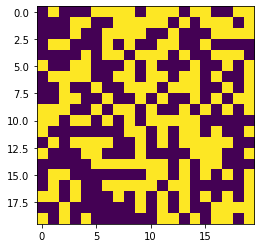

In [109]:
plt.imshow(lattice_0)

In this figure, the yellow pixels indicate entries with a top spin, while the purple pixels indicate a bottom spin.\

Let us make a function $\tt total\_energy()$ that calculates the total energy of the system. Again, the formula is indicated as
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where $s_i$ and $s_j$ are adjacent pair of spins. This can be easily implemented as:
$$ 
E = -J 
\left(\sum_{i=2}^{N}\sum_{j=1}^{N}s_{ij}s_{(i-1)j}\right)_{(top)}
\left(\sum_{i=1}^{N-1}\sum_{j=1}^{N}s_{ij}s_{(i+1)j}\right)_{(bot)}  
\left(\sum_{i=1}^{N}\sum_{j=2}^{N}s_{ij}s_{i(j-1)}\right)_{(left)}
\left(\sum_{i=1}^{N}\sum_{j=1}^{N-1}s_{ij}s_{i(j+1)}\right)_{(right)} 
$$
Where the top summation of top pairs having a start bound of $i=2,j=1$, the summation of bottom pairs having an end bound of $i=19, j=20$, the summation of left pairs having a start bound of $i=1, j=2$, and the summation of right pairs having an end bound of $i=20, j=19$.

In [38]:
@jit(nopython=True, parallel=True)
def total_energy(lattice, J):
    lattice_copy = np.copy(lattice)
    energy_0 = 0
    mu_top = 0 # top pair
    mu_bot = 0 # bottom pair
    mu_left = 0 # left pair
    mu_right = 0 # right pair
    mu_total = 0 # total adjacent interactions for each entry
    for i in range(N):
        for j in range(N):
            if i > 0: 
                mu_top = lattice_copy[i][j]*lattice_copy[i-1][j] # top summation
            if i < 19:     
                mu_bot = lattice_copy[i][j]*lattice_copy[i+1][j] # bottom summation
            if j > 0:    
                mu_left = lattice_copy[i][j]*lattice_copy[i][j-1] # left summation
            if j < 19:
                mu_right = lattice_copy[i][j]*lattice_copy[i][j+1] # right summation
            mu_total = mu_top + mu_bot + mu_left + mu_right
            energy_0 += mu_total
    energy_0 = -J*energy_0 # interactions multiplied by energy J
    return energy_0

Next, we create the $\tt metropolis()$ function that randomly tries to pick any spin and flips it to see if it would get the system closer to polarization. This function depends on the initial lattice, interaction constant $J$, temperature $T$, and the number of time steps. We note that the Metropolis acceptance formula is described as:
$$
P_{a} = \begin{cases}
    1 & E_{j} \leq E_{i} \\
    \exp(-\beta E_{j}-E_{i}) & E_{j} > E_{i}
\end{cases}
$$
Here, $P_a$ is the probability that we accept the flipping of a spin. $E_i$ is the initial energy of the lattice, while $E_j$ is the energy after the flipping of a spin was made. We also define the constant $\beta = J/T$. \
If $E_{j} \leq E_{i}$, we absolutely accept the flip, effectively changing the lattice. Otherwise, we may or may not accept the flip in accordance to $\exp(-\beta E_{j}-E_{i})$.

In [87]:
@jit(nopython=True, parallel=True)
def metropolis(lattice, J, T, time):
    magnet_total = [] # array for total magnetization for each time step
    lattice_copy = np.copy(lattice)
    beta = J/T
    for t in range(time-1):
        # Calculate initial energy
        Ei = total_energy(lattice_copy, J)
        # Pick random spin
        x1 = np.random.randint(0,N)
        y1 = np.random.randint(0,N)
        lattice_copy[x1][y1] = -lattice_copy[x1][y1]
        # Calculate new energy
        Ef = total_energy(lattice_copy, J)
        # Metropolis algorithm
        dE = Ef - Ei
        if dE <= 0:
            magnet_total.append(lattice_copy.sum())
        else:
            if np.random.random() < np.exp(-beta*dE):
                magnet_total.append(lattice_copy.sum())
            else:
                lattice_copy[x1][y1] = -lattice_copy[x1][y1]
                magnet_total.append(lattice_copy.sum())
    return magnet_total, lattice_copy

We perform this function by storing it in $\tt magnet\_total\_0$. We then plot its corresponding magnetization through time and its latest lattice structure. We define $J=1, T=1$ and do 1 million flips.

In [88]:
magnet_total_0 = metropolis(lattice_0, 1, 1, 1000000)

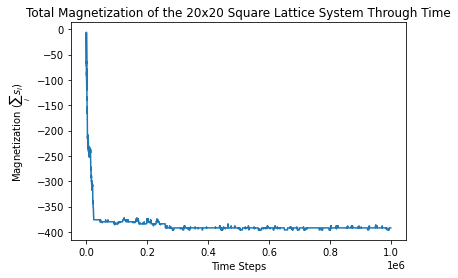

In [89]:
plt.plot(magnet_total_0[0])
plt.title('Total Magnetization of the 20x20 Square Lattice System Through Time')
plt.xlabel('Time Steps')
plt.ylabel('Magnetization ($\sum_{i}s_i$)')
plt.show()

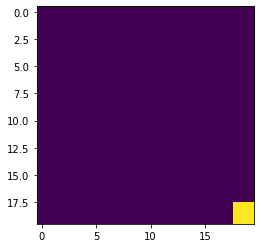

In [90]:
plt.imshow(magnet_total_0[1])

We see here that the lattice is almost negatively polarized, with its magnetization close to -400. \
Let us then test this function again with the same arguments.

In [93]:
magnet_total_0 = metropolis(lattice_0, 1, 1, 1000000)

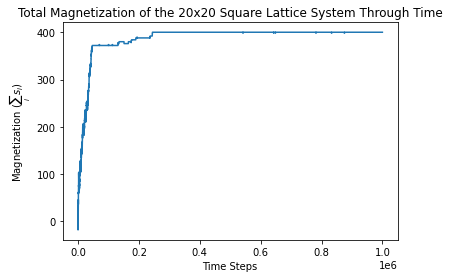

In [94]:
plt.plot(magnet_total_0[0])
plt.title('Total Magnetization of the 20x20 Square Lattice System Through Time')
plt.xlabel('Time Steps')
plt.ylabel('Magnetization ($\sum_{i}s_i$)')
plt.show()

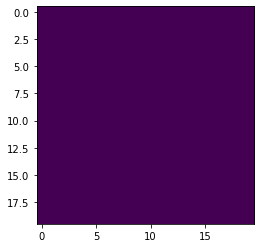

In [95]:
plt.imshow(magnet_total_0[1])

In the line chart, we see the lattice is completely positively polarized through time. This is also shown in the lattice mapping where we almost see no yellow pixels. \
Let us then try this with varying temperatures $T = [1,2,3,4,5]$. We will plot both their magnetization and lattice color map. 

In [96]:
magnet_total_1 = metropolis(lattice_0, 1, 1, 1000000)
magnet_total_2 = metropolis(lattice_0, 1, 2, 1000000)
magnet_total_3 = metropolis(lattice_0, 1, 3, 1000000)
magnet_total_4 = metropolis(lattice_0, 1, 4, 1000000)
magnet_total_5 = metropolis(lattice_0, 1, 5, 1000000)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


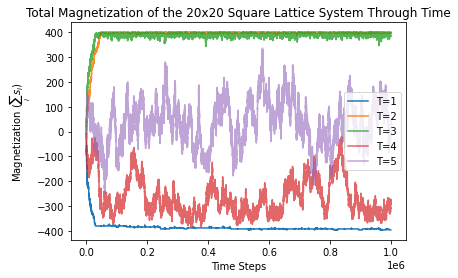

In [97]:
plt.plot(magnet_total_1[0], label='T=1', alpha=1)
plt.plot(magnet_total_2[0], label='T=2', alpha=0.9)
plt.plot(magnet_total_3[0], label='T=3', alpha=0.8)
plt.plot(magnet_total_4[0], label='T=4', alpha=0.7)
plt.plot(magnet_total_5[0], label='T=5', alpha=0.6)
plt.legend()
plt.title('Total Magnetization of the 20x20 Square Lattice System Through Time')
plt.xlabel('Time Steps')
plt.ylabel('Magnetization ($\sum_{i}s_i$)')
plt.show()

We see here that the magnetization of the lattice at $T=1$ and $T=2$ are staying in equilibrium well while at $T=3$, the lattice starts to struggle in maintaining equilibrium of complete polarization. At $T=4$, it touches -400 some time in a while. Finally, at $T=5$ the lattice entries spin chaotically, with it strugging to institute equilibrium at the extreme polarization vales.

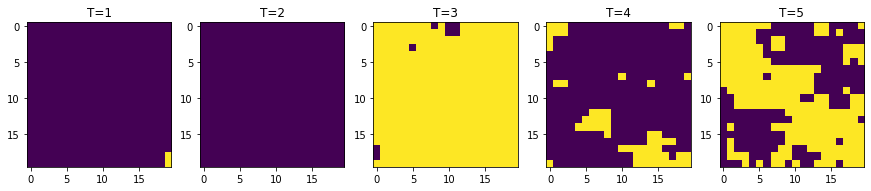

In [107]:
fig, ax = plt.subplots(1,5, figsize=(15,3))
ax[0].imshow(magnet_total_1[1])
ax[0].set_title('T=1')
ax[1].imshow(magnet_total_2[1])
ax[1].set_title('T=2')
ax[2].imshow(magnet_total_3[1])
ax[2].set_title('T=3')
ax[3].imshow(magnet_total_4[1])
ax[3].set_title('T=4')
ax[4].imshow(magnet_total_5[1])
ax[4].set_title('T=5')
plt.show()

This is also manifested in the final lattice structure. We can infer that the lattice are polarized in $T=[1,2,3]$ while it struggles to maintain polarization at $T=[4,5]$.

The Metropolis algorithm helps the system achieve equilibrium using the acceptance probability. It accepts spin flip changes if there is a difference in lower energy and conditionally accepts spin flip changes otherwise. This conditionality stems from how random would the condition be found inside $\exp(-\beta E_{j}-E_{i})$ which resembles a Boltzmann distribution.\
\
The algorithm spends most of its time figuring out if changes in higher energy respect the distribution, and if such changes would say, flip into more down spins, it draws into that configuration. Eventually, when almost all spins are the same, the interactions would be the same each time step, hence there is lesser energy difference. This system therefore would reach equilibrium.\
\
When we increase the temperature of the system, the probability distribution flattens, and it would be hard for the algorithm to check if the spin flips would still respect the distribution. Hence in the cases of $T=4$ and $T=5$, the system is not polarized fully. Hence if we keep on increasing the temperature, the lattice would lose its ability to magnetize.